In [1]:
import keras
keras.__version__

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


'2.1.5'

In [2]:
from keras.layers import SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.datasets import reuters
from keras.preprocessing import sequence
import numpy as np

max_features = 20000  # number of words to consider as features
maxlen = 1000  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 1000)
input_test shape: (2246, 1000)
46 classes
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [14]:
from keras.layers import Dense, Dropout, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, return_sequences=True))
model.add(SimpleRNN(128))
model.add(Dropout(0.5))
model.add(Dense(46, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 39s 5ms/step - loss: 3.0235 - acc: 0.2580 - val_loss: 2.4388 - val_acc: 0.3450
Epoch 2/10
7185/7185 [==============================] - 38s 5ms/step - loss: 2.5949 - acc: 0.3176 - val_loss: 2.4233 - val_acc: 0.3450
Epoch 3/10
7185/7185 [==============================] - 38s 5ms/step - loss: 3.4315 - acc: 0.1820 - val_loss: 2.4411 - val_acc: 0.3450
Epoch 4/10
7185/7185 [==============================] - 38s 5ms/step - loss: 3.0880 - acc: 0.2341 - val_loss: 2.4195 - val_acc: 0.3450
Epoch 5/10
7185/7185 [==============================] - 38s 5ms/step - loss: 2.5567 - acc: 0.3478 - val_loss: 2.4309 - val_acc: 0.3450
Epoch 6/10
7185/7185 [==============================] - 38s 5ms/step - loss: 2.5225 - acc: 0.3495 - val_loss: 2.4190 - val_acc: 0.3450
Epoch 7/10
7185/7185 [==============================] - 38s 5ms/step - loss: 2.4903 - acc: 0.3528 - val_loss: 2.3735 - val_acc: 0.3450
Epoch 8

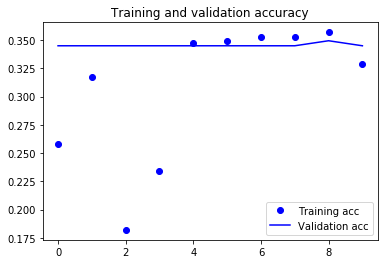

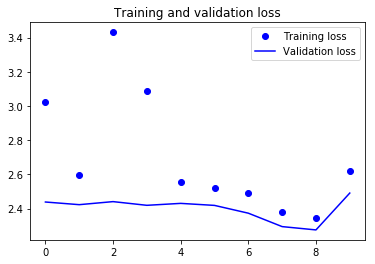

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 87s 12ms/step - loss: 2.8273 - acc: 0.3276 - val_loss: 2.4530 - val_acc: 0.3450
Epoch 2/10
7185/7185 [==============================] - 87s 12ms/step - loss: 2.5585 - acc: 0.3445 - val_loss: 2.2981 - val_acc: 0.3450
Epoch 3/10
7185/7185 [==============================] - 87s 12ms/step - loss: 2.2971 - acc: 0.3417 - val_loss: 2.1046 - val_acc: 0.3461
Epoch 4/10
7185/7185 [==============================] - 87s 12ms/step - loss: 2.0813 - acc: 0.3354 - val_loss: 2.0407 - val_acc: 0.3617
Epoch 5/10
7185/7185 [==============================] - 87s 12ms/step - loss: 1.9938 - acc: 0.3486 - val_loss: 2.3288 - val_acc: 0.3506
Epoch 6/10
7185/7185 [==============================] - 87s 12ms/step - loss: 1.9160 - acc: 0.3862 - val_loss: 1.9209 - val_acc: 0.3918
Epoch 7/10
7185/7185 [==============================] - 86s 12ms/step - loss: 1.8217 - acc: 0.4024 - val_loss: 1.8493 - val_acc: 0.3907


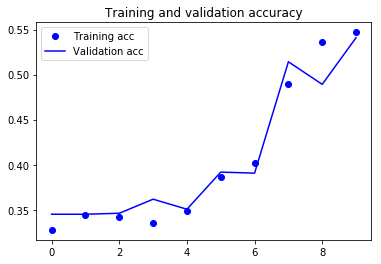

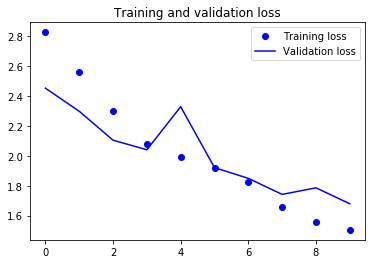

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()